In [1]:
import numpy as np
from numpy.random import exponential as exp
from numpy.random import normal as nrl
from numpy.random import poisson as pss
from numpy.random import binomial as bnm
import pandas as pd
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

import seaborn as sns

import vk
import time
import random as rd

## 1. Матрица Вандермонда (10 баллов)

Напишите функцию, генерирующую матрицу [Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принемающую на вход вектор $(𝑥_1,...,𝑥_𝑛)$ .
В этом задании запрещается пользоваться готовыми реализациями (например, numpy.vander), а также np.repeat и np.transpose.
При решение задействуйте np.reshape и/или np.newaxis.

In [2]:
def get_vector(vector_input):
    vector_input = [int(i) for i in vector_input.split()]
    return vector_input

In [3]:
def vander(vector_input):
    power_list = np.array([int(num) for num in range(len(vector_input))])
    vector_input = np.array(vector_input).reshape(-1, 1)
    vander_matrix = vector_input ** power_list
    return vander_matrix

In [4]:
vector_input = get_vector(input())
print(vander(vector_input))

1 2 3 4 5
[[  1   1   1   1   1]
 [  1   2   4   8  16]
 [  1   3   9  27  81]
 [  1   4  16  64 256]
 [  1   5  25 125 625]]


In [5]:
# проверим на встроенной ф-ции
np.vander(vector_input)

array([[  1,   1,   1,   1,   1],
       [ 16,   8,   4,   2,   1],
       [ 81,  27,   9,   3,   1],
       [256,  64,  16,   4,   1],
       [625, 125,  25,   5,   1]])

Мы можем заметить, что наша матрица готова:

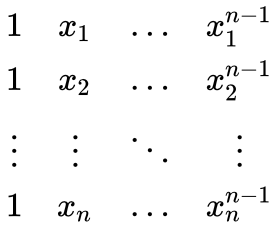

## 2. Марафон (30 баллов)

#### История
Как-то раз Винни-Пух, Пятачок, Кролик и Иа-Иа решили пробежать марафон. Они договорились бежать $n$ часов. Побеждает тот, кто пробегает за эти $n$ часов больше всего километров. Каждый участник бежит по-разному, то сколько он пробежит за один час поддается одному из законов распределений. Например, если имеется равномерное распределение $U[1,3]$, то участник может пробежать за первый час 1.3км, за второй 2.4км и так далее.

* Винни-Пух в целом может пробежать достаточно много, но с большой вероятностью останавливается покушать мёда и пробегает мало. Его закон распределения это показательное распределение с $\lambda = 1$.
* Пятачок бежит в одном темпе и старается пробегать приблизительно одинаковую дистанцию. Изредка, он может перепутать направление и немного пробежать не в ту сторону. Его закон распределения это нормальное распределение $N(1, 1)$.
* Кролик - перфекционист. Он бежит целое количество киллометров. Если он понимает, что за оставшееся время он уже не пробежит еще один километр, то он останавливается и ждет следующий час. Его закон распределения это распределение Пуассона с $\lambda = 1$.
* Иа-Иа в течение часа может грустить с вероятностью 0.5 и пробжеать 0 километров или быть очень веселым (с вероятностью 0.5) и пробежать 2 километра. Его закон распределения это распределение Бернулли.

#### Задание №1

Вам нужно: 
* Создать трехмерную матрицу размера $10^4 \times 4 \times n$. Первая ось отвечает за номер марафона, вторая ось за каждого участника, а третья ось за каждый час марафона. Вторую и третью ось можно поменять, если вам так удобнее.
* Выявить победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.
* Запрещено пользоваться циклами. Нужно использовать возможности numpy.

Что можно сказать о результатах?

#### Задание №2
 
Участники решили объединиться в пары: Винни-Пух с Пятачком, Кролик с Иа-Иа. Они решили суммировать свои результаты.

Вам нужно: 
* Сгенерировать новую трехмерную матрицу, но уже объединив участников в команды.
* Выявить команду-победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.

Логичны ли полученные результаты?

#### Задание №1

Вам нужно: 
* Создать трехмерную матрицу размера $10^4 \times 4 \times n$. Первая ось отвечает за номер марафона, вторая ось за каждого участника, а третья ось за каждый час марафона. Вторую и третью ось можно поменять, если вам так удобнее.
* Выявить победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.
* Запрещено пользоваться циклами. Нужно использовать возможности numpy.

Что можно сказать о результатах?

In [6]:
def plot_bar(data_for_x, data_for_y):
    fig, ax = plt.subplots()
    
    ax.bar(data_for_x, data_for_y, color = 'darkgreen', zorder = 3)
    ax.grid()
    
    fig.set_figwidth(5)
    fig.set_figheight(9)
    
    plt.title('Столбчатая диаграмма', fontsize = 15)
    plt.xlabel('Имена', fontsize = 10)
    plt.ylabel('Число побед', fontsize = 10)

In [7]:
# создаем трехмерную матрицу нужных размеров
n = int(input())
runs = np.zeros([4, 10000, n])

distr = [exp(1, [10000, n]), nrl(1, 1, [10000, n]), 
         pss(1, [10000, n]), bnm(1, 0.5, [10000, n]) * 2]

runs[0] = runs[0] + distr[0]
runs[1] = runs[1] + distr[1]
runs[2] = runs[2] + distr[2]
runs[3] = runs[3] + distr[3]

# трехмерная матрица готова
runs.shape

1000


(4, 10000, 1000)

In [8]:
# найдем дистанцию по забегам за n часов
runs_sums = np.zeros([4, 10000])
runs_sums[0] = np.sum(runs[0], 1)
runs_sums[1] = np.sum(runs[1], 1)
runs_sums[2] = np.sum(runs[2], 1)
runs_sums[3] = np.sum(runs[3], 1)

# 0 = Винни-Пух, показательное распределение
# 1 = Пятачок, нормальное распределение
# 2 = Кролик, распределение Пуассона
# 3 = Иа-Иа, распределение Бернулли
victories = pd.DataFrame(np.argmax(runs_sums, axis = 0), 
                         columns = ['Победитель'])
victories = victories.groupby(victories['Победитель'])
data_for_y = [victories.size()[0], victories.size()[1], 
              victories.size()[2], victories.size()[3]]
data_for_x = ['Винни-Пух', 'Пятачок', 'Кролик', 'Иа-Иа']

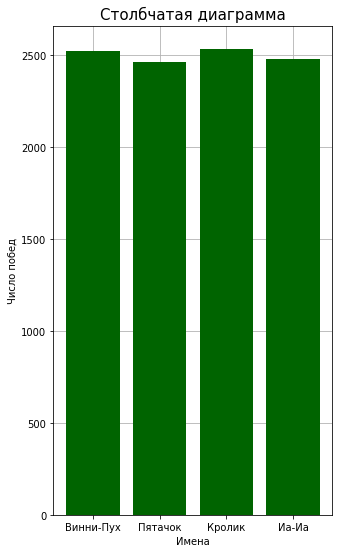

In [9]:
plot_bar(data_for_x, data_for_y)

Мы замечаем, что герои нашего забега побеждают примерно одинаковое количество раз.

#### Задание №2
 
Участники решили объединиться в пары: Винни-Пух с Пятачком, Кролик с Иа-Иа. Они решили суммировать свои результаты.

Вам нужно: 
* Сгенерировать новую трехмерную матрицу, но уже объединив участников в команды.
* Выявить команду-победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.

Логичны ли полученные результаты?

In [10]:
# создаем трехмерную матрицу нужных размеров
n = int(input())
runs = np.zeros([2, 10000, n])

distr = [exp(1, [10000, n]), nrl(1, 1, [10000, n]), 
         pss(1, [10000, n]), bnm(1, 0.5, [10000, n]) * 2]

runs[0] = runs[0] + distr[0] + distr[1]
runs[1] = runs[1] + distr[2] + distr[3]

# трехмерная матрица готова
runs.shape

1000


(2, 10000, 1000)

In [11]:
# найдем дистанцию по забегам за n часов
runs_sums = np.zeros([2, 10000])
runs_sums[0] = np.sum(runs[0], 1)
runs_sums[1] = np.sum(runs[1], 1)

# 0 = Команда Пух и Пятачок, показательное и нормальное распределение
# 1 = Команда Кролик и Иа-Иа, распределение Пуассона и Бернулли

victories = pd.DataFrame(np.argmax(runs_sums, axis = 0), 
                         columns = ['Победитель'])
victories = victories.groupby(victories['Победитель'])
data_for_y = [victories.size()[0], victories.size()[1]]
data_for_x = ['Команда Пух и Пятачок', 'Команда Кролик и Иа-Иа']
print(data_for_y)

[4993, 5007]


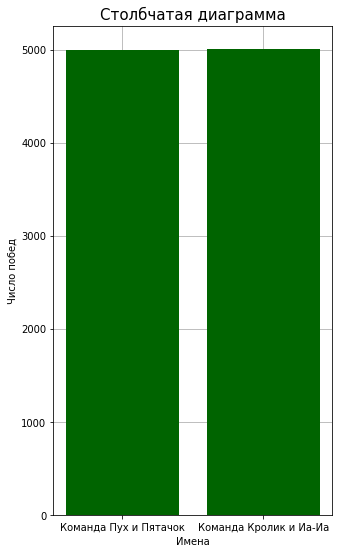

In [12]:
plot_bar(data_for_x, data_for_y)

Мы замечаем, что герои нашего забега, объединённые в команды, побеждают примерно одинаковое количество раз. Причем значения командных побед очень близки друг к другу.

## 3. Avito (30 баллов)

В этом задании вам нужно будет написать функцию, которая парсит [Авито](https://www.avito.ru) (будем рассматривать только Москву). Эта функция принимает два параметра:
* search - то, что мы ищем на avito
* page - номер страницы, с которой парсим информацию

```python
def parse_page(search, page):
    # тут ваш код
df = parse_page('гречка', 4)
```
Нужно скачать следующую информацию:
* название объявления
* ссылка на объявление
* цена
* метро (если есть), вам нужно аккуратно обрабатывать None или использовать конструкцию try-except
* сколько метров от метро (если есть)

Эту информацию лучше сохранить в виде pandas df.

В данном задании **не нужно** парсить все страницы (вас могут забанить). Нужно лишь сделать функцию, которая парсит одну страницу. Чтобы вас не забанили сделаейте request один раз и работайте с вашей страничкой без функции. После того как все будет готово, оберните весь ваш код в функцию.

In [13]:
def parse_page(search: str, page: int):
    AVITO_df = []
    AVITO_link = 'https://www.avito.ru/moskva?q={}&p={}'.format(search, page)
    response = BeautifulSoup(requests.get(AVITO_link).content, 'html.parser').find_all('div', {'class' : 'description'})
    
    for i in response:
        name = i.find('h3', {'class' : 'snippet-title'}).text
        link = 'https://www.avito.ru' + i.find('a', {'class' : 'snippet-link'}).attrs['href']
        price = i.find('div', {'class' : 'snippet-price-row'}).text.replace('\n', '').replace('₽', 'рублей')
        
        try:
            metro = i.find('span', {'class' : 'item-address-georeferences-item__content'}).text
        except:
            metro = None
        
        try:
            dist = i.find('span', {'class' : 'item-address-georeferences-item'}).find('span', {'class' : 'item-address-georeferences-item__after'}).text
        except:
            dist = None
        
        AVITO_df.append([name, link, price, metro, dist])
    
    return AVITO_df

In [14]:
to_find, page = 'гречка', 4
AVITO_df = pd.DataFrame(parse_page(to_find, page), columns = ['Объявление', 'Ссылка', 'Цена', 'Метро', 'Дистанция от метро'])
AVITO_df

,Объявление,Ссылка,Цена,Метро,Дистанция от метро
0,Туклипсы,https://www.avito.ru/moskva/sport_i_otdyh/tukl...,Бесплатно,Дмитровская,None
1,Коробки от iPhone бесплатно,https://www.avito.ru/moskva/telefony/korobki_o...,Бесплатно,Беляево,None
2,"Студия, 36 м², 4/6 эт.",https://www.avito.ru/moskva/kvartiry/studiya_3...,1 999 рублей за сутки,Медведково,"1,4 км"
3,Психологические консультации в условиях пандемии,https://www.avito.ru/moskva/predlozheniya_uslu...,2 000 рублей,Площадь революции,400 м
4,Fender American deluxe Precision bass 97,https://www.avito.ru/moskva/muzykalnye_instrum...,96 000 рублей,Дубровка,100 м
5,Бесплатно игрушки My Little Pony,https://www.avito.ru/moskva/tovary_dlya_detey_...,Бесплатно,Солнцево,800 м
6,Ретро кошелек бесплатно,https://www.avito.ru/moskva/odezhda_obuv_akses...,Цена не указана,Беляево,600 м
7,"Audi A8, 2011",https://www.avito.ru/moskva/avtomobili/audi_a8...,1 199 000 рублей,Строгино,None
8,Сухой паёк ирп свежый 06.05.20г. выпуска,https://www.avito.ru/moskva/sport_i_otdyh/suho...,399 рублей,Охотный ряд,200 м
9,Suzuki vl800 intruder,https://www.avito.ru/moskva/mototsikly_i_motot...,295 000 рублей,Сухаревская,200 м


## 4. Walmart (30 баллов)

В файле *walmart.csv* нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.


Вам нужно выполнить следующие задания:
1. Загрузить файл с данными. Отобразить первые и последние 5 наблюдений. Узнать сколько наблюдений и переменных есть в вашем наборе данных. Какой тип(формат) имеет каждая переменная? Привести переменную Date к формату даты.
2. Разобраться с пропущенными значениями:
    * вывести сколько пропущенных значений в процентах есть в каждой переменной;
    * удалить переменные, которые имеют более 60% пропущенных значений.
3. Сколько магазинов и отделов присутствует в выборке, за какой период времени у нас имеются данные? 
4. Посмотреть динамику продаж в магазинах walmart в целом. Для этого можно построить график, где по оси X будет дата, а по оси Y продажи всей сети Walmart.
5. Найдите и нарисуйте матрицу корреляции для числовых показателей.
6. Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.
7. Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них

**1. Загрузить файл с данными +. Отобразить первые и последние 5 наблюдений +. Узнать сколько наблюдений и переменных есть в вашем наборе данных +. Какой тип(формат) имеет каждая переменная +? Привести переменную Date к формату даты +.**

In [15]:
wal_df = pd.read_csv('')
wal_df.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [16]:
wal_df.tail()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
418238,45,2012-10-19,98,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [17]:
wal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418239 entries, 0 to 418238
Data columns (total 16 columns):
Store           418239 non-null int64
Date            418239 non-null object
Dept            418239 non-null int64
Weekly_Sales    418239 non-null float64
IsHoliday       418239 non-null bool
Type            418239 non-null object
Size            418239 non-null int64
Temperature     418239 non-null float64
Fuel_Price      418239 non-null float64
MarkDown1       147484 non-null float64
MarkDown2       108144 non-null float64
MarkDown3       134568 non-null float64
MarkDown4       132315 non-null float64
MarkDown5       148182 non-null float64
CPI             418239 non-null float64
Unemployment    418239 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.3+ MB


In [18]:
wal_df['Date'] = pd.to_datetime(wal_df['Date'], format = '%Y-%m-%d')
wal_df.info()
# увидели, что поменялся тип у признака Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418239 entries, 0 to 418238
Data columns (total 16 columns):
Store           418239 non-null int64
Date            418239 non-null datetime64[ns]
Dept            418239 non-null int64
Weekly_Sales    418239 non-null float64
IsHoliday       418239 non-null bool
Type            418239 non-null object
Size            418239 non-null int64
Temperature     418239 non-null float64
Fuel_Price      418239 non-null float64
MarkDown1       147484 non-null float64
MarkDown2       108144 non-null float64
MarkDown3       134568 non-null float64
MarkDown4       132315 non-null float64
MarkDown5       148182 non-null float64
CPI             418239 non-null float64
Unemployment    418239 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 48.3+ MB


В нашем дата-сете присутствуют признаки типов: целочисленные, вещественные, булевы (True / False), datetime64 - тип для хранения даты / времени, object, хранящий символ (признак Type - символ). Всего 418239 наблюдений, 16 признаков.

**2. Разобраться с пропущенными значениями:**
* **вывести сколько пропущенных значений в процентах есть в каждой переменной +**
* **удалить переменные, которые имеют более 60% пропущенных значений +**

In [19]:
# сумма пропусков по колоннам
wal_df_shape = wal_df.shape[0]
wal_df_nulls = wal_df.isnull().sum()

round((wal_df_nulls / wal_df_shape * 100))

Store            0.0
Date             0.0
Dept             0.0
Weekly_Sales     0.0
IsHoliday        0.0
Type             0.0
Size             0.0
Temperature      0.0
Fuel_Price       0.0
MarkDown1       65.0
MarkDown2       74.0
MarkDown3       68.0
MarkDown4       68.0
MarkDown5       65.0
CPI              0.0
Unemployment     0.0
dtype: float64

In [20]:
# признаки, имеющие более 60% пропусков удалены
wal_df = wal_df.drop(round((wal_df_nulls / wal_df_shape * 100))[lambda i: i > 60.0].index, axis = 1)
wal_df

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,192.327265,8.667


**3. Сколько магазинов и отделов присутствует в выборке, за какой период времени у нас имеются данные +?**

**4. Посмотреть динамику продаж в магазинах walmart в целом +. Для этого можно построить график, где по оси X будет дата, а по оси Y продажи всей сети Walmart +.**

In [21]:
stors = wal_df.groupby(wal_df['Store'])
depts = wal_df.groupby(wal_df['Dept'])
date_0, date_1 = sorted(list(wal_df['Date']))[0], sorted(list(wal_df['Date']))[1]
print('Число магазинов: ', len(stors), '\n', 'Число департаментов: ', len(depts), sep = '')
print('Первая дата:\n', 'Число -', date_0.date().day, 'Месяц -', date_0.date().month, 'Год -', date_0.date().year)
print('Последняя дата:\n', 'Число -', date_1.date().day, 'Месяц -', date_1.date().month, 'Год -', date_1.date().year)

Число магазинов: 45
Число департаментов: 81
Первая дата:
 Число - 5 Месяц - 2 Год - 2010
Последняя дата:
 Число - 5 Месяц - 2 Год - 2010


In [22]:
# недели, когда совершились продажи + суммарные продажи за эти недели
sales = wal_df.groupby(wal_df['Date']).sum()['Weekly_Sales']
sales

Date
2010-02-05    49750737.50
2010-02-12    48336670.90
2010-02-19    48276983.78
2010-02-26    43968565.13
2010-03-05    46871469.30
                 ...     
2012-09-21    44354547.19
2012-09-28    43734749.40
2012-10-05    47566865.36
2012-10-12    46126816.83
2012-10-19    45120768.61
Name: Weekly_Sales, Length: 142, dtype: float64

Text(0.5, 1.0, 'Общая динамика продаж')

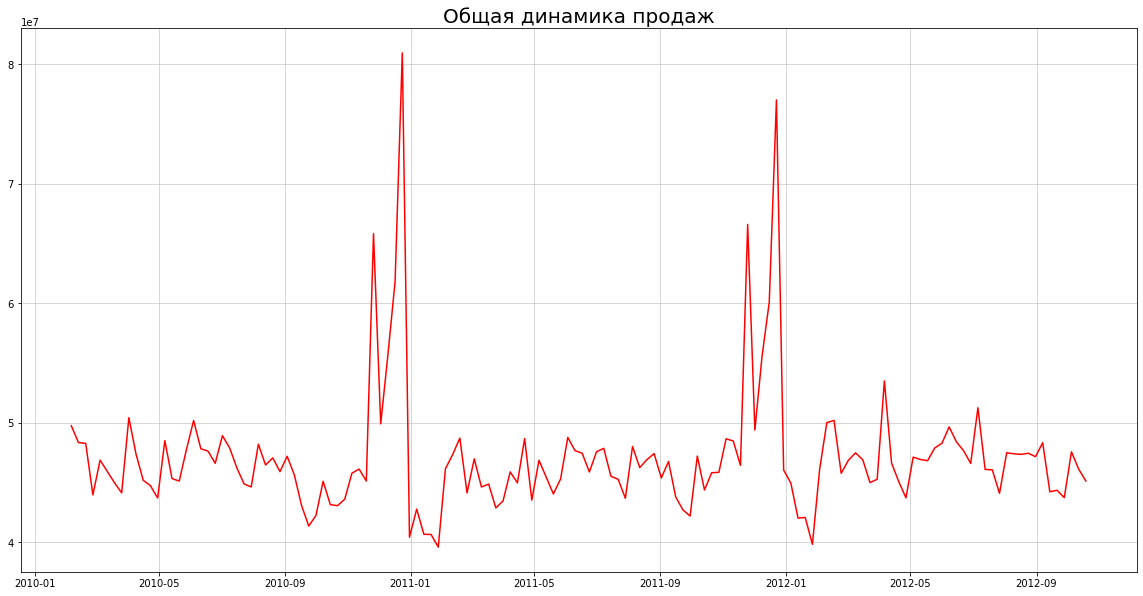

In [23]:
pd.plotting.register_matplotlib_converters()

fig = plt.figure(figsize = (20, 10))
plt.grid(linewidth = 0.5)

plt.plot(sales, color = 'r')
plt.title('Общая динамика продаж', fontsize = 20)

Тенденция продаж такова, что к новогодним праздникам объем продаж резко увеличивается.

**5. Найдите + и нарисуйте + матрицу корреляции для числовых показателей +.**

Так как у нас есть некоторые нечисловые показатели, нам необходимо их убрать из корреляционной матрицы.

**6. Найдите топ-5 самых больших магазинов по суммарным продажам за все время + и отобразите динамику их продаж на одном графике +.**

In [24]:
wal_df.drop(['Date', 'IsHoliday', 'Type'], axis = 1).corr()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,0.024170,-0.085175,-0.182654,-0.049933,0.064666,-0.211129,0.208524
Dept,0.024170,1.000000,0.148345,-0.003026,0.004509,0.003417,-0.007544,0.007992
Weekly_Sales,-0.085175,0.148345,1.000000,0.243733,-0.002197,0.000385,-0.020791,-0.026114
Size,-0.182654,-0.003026,0.243733,1.000000,-0.057979,0.003803,-0.003249,-0.068803
Temperature,-0.049933,0.004509,-0.002197,-0.057979,1.000000,0.144837,0.181292,0.097301
Fuel_Price,0.064666,0.003417,0.000385,0.003803,0.144837,1.000000,-0.163226,-0.032461
CPI,-0.211129,-0.007544,-0.020791,-0.003249,0.181292,-0.163226,1.000000,-0.299723
Unemployment,0.208524,0.007992,-0.026114,-0.068803,0.097301,-0.032461,-0.299723,1.000000


In [25]:
corr = wal_df.corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2).set_properties(**{'font-size': '12pt'})

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment
Store,1,0.024,-0.085,-0.00057,-0.18,-0.05,0.065,-0.21,0.21
Dept,0.024,1,0.15,0.00089,-0.003,0.0045,0.0034,-0.0075,0.008
Weekly_Sales,-0.085,0.15,1,0.013,0.24,-0.0022,0.00038,-0.021,-0.026
IsHoliday,-0.00057,0.00089,0.013,1,0.00058,-0.16,-0.077,-0.0017,0.0094
Size,-0.18,-0.003,0.24,0.00058,1,-0.058,0.0038,-0.0032,-0.069
Temperature,-0.05,0.0045,-0.0022,-0.16,-0.058,1,0.14,0.18,0.097
Fuel_Price,0.065,0.0034,0.00038,-0.077,0.0038,0.14,1,-0.16,-0.032
CPI,-0.21,-0.0075,-0.021,-0.0017,-0.0032,0.18,-0.16,1,-0.3
Unemployment,0.21,0.008,-0.026,0.0094,-0.069,0.097,-0.032,-0.3,1


Text(0.5, 1.0, 'Общая динамика продаж')

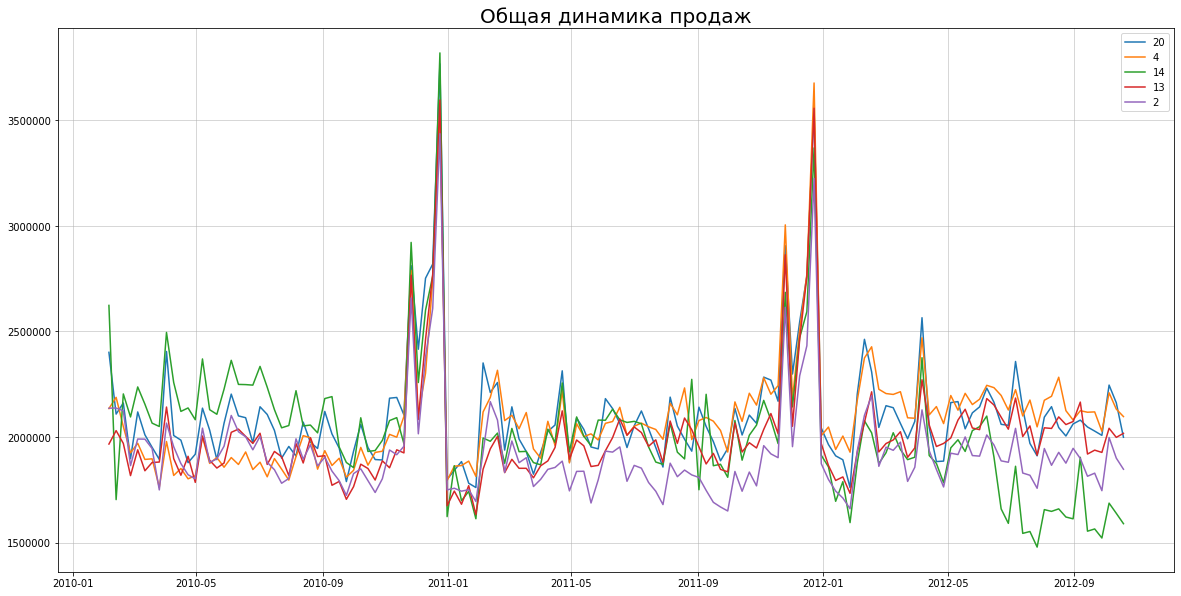

In [26]:
top_5_stores = wal_df.groupby(wal_df['Store']).sum().sort_values(by = ['Weekly_Sales'], ascending = False)[:5].index
top_5_sales = []

for i in top_5_stores:
    top_5_sales.append(wal_df[wal_df['Store'] == i].groupby(wal_df['Date']).sum()['Weekly_Sales'])
    
pd.plotting.register_matplotlib_converters()

fig = plt.figure(figsize = (20, 10))
plt.grid(linewidth = 0.5)

for i in top_5_sales:
    plt.plot(i)

plt.legend(wal_df.groupby(wal_df['Store']).sum().sort_values(by = ['Weekly_Sales'], ascending = False)[:5].index)
plt.title('Общая динамика продаж', fontsize = 20)

Тенденция продаж такова, что к новогодним праздникам объем продаж резко увеличивается во всех магазинах. В целом, все магазины уверенно чувсвуют себя в течение года.

**7. Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А + и нарисуйте столбчатую диаграмму для них +.**

Text(0, 0.5, 'Объём продаж')

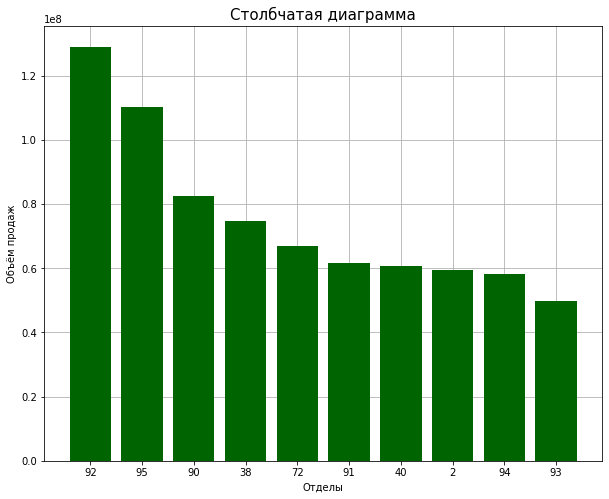

In [27]:
wal_time_df = wal_df.loc[(wal_df['Date'] >= '2011-01-01')]
wal_time_df = wal_time_df.loc[(wal_time_df['Date'] < '2012-01-01')]
wal_time_df = wal_time_df.loc[((wal_time_df['Type'] == 'A'))]
wal_time_df = wal_time_df.groupby(wal_time_df['Dept']).sum().sort_values(by = ['Weekly_Sales'], ascending = False)
wal_time_df_top_10 = wal_time_df[:10]

fig, ax = plt.subplots()

ax.bar([str(i) for i in wal_time_df_top_10.index], list(wal_time_df_top_10.values[:, 1]), color = 'darkgreen', zorder = 3)
ax.grid()

fig.set_figwidth(10)
fig.set_figheight(8)

plt.title('Столбчатая диаграмма', fontsize = 15)
plt.xlabel('Отделы', fontsize = 10)
plt.ylabel('Объём продаж', fontsize = 10)

## 5. Парадокс дней рождений (30 баллов)

Прочитайте на википедии про [парадокс дней рождений](https://ru.wikipedia.org/wiki/Парадокс_дней_рождения). В этой задаче нам предстоит его проверить. Итак, в произвольной группе из  $50$ человек вероятность того, что хотя бы у двоих людей дни рождения совпадут, равна  $0.97$. Но это всё только в теории. При решении задачи мы предполагаем, что рождения людей равномерно распределены в течение года. Однако на практике это может быть не так. В связи с этим реальная вероятность может отличаться от теоретической.

В этой задачке вам предстоит проверить парадокс дней рождений на эмпирических данных. От вас требуется:
1. Выбрать какое-то большое сообщество в Vk. С помощью VkAPI выкачать инфорацию по ее подписчикам (самое главное это дата рождения, а также id пользователя, который будет его характеризовать. Не оставляйте свой токен 
2. Удалите из данных всех, кто не указал когда он родился. Приведите колонку с датами рождений к удобному, однообразному виду.
3. Постройте гистограмму, на которой было бы понятно, в какой месяц родилось какое количество людей. Правда ли, что рождаемость людей в течение года распределена равномерно?
4. Эмпирически оцените вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения. Для этого напишите цикл, в ходе которого из таблички будет делаться подвыборка из 50 строк. Для этих 50 строк внутри условия вы должны проверить совпадение дней рождений. Если совпало, то нужно запомнить это в переменную счётчик, которую вы впоследствии, чтобы получить вероятность, поделите на длину цикла.

**Обратите внимание, что часто придётся прогонять один и тот же код. Не надо его копировать. Оформите его в виде функции.** 

In [28]:
def get_members(groupid, version):
    
    claster = vk_api.groups.getMembers(group_id = groupid, v = version, fields = 'bdate')
    time.sleep(0.5)
    
    data = claster['items']
    
    for i in range(1, claster['count'] // 1000 + 1):  
        data += vk_api.groups.getMembers(group_id = groupid, v = 5.103, offset = i * 1000, fields = 'bdate')['items']
        time.sleep(0.5)
    
    return data

In [29]:
def clean_data(group_data):
    group_df, date = [], []
    
    for element in group_data:
        try:
            group_df.append([element['id'], element['bdate']])
        except:
            continue
    
    result_df = []
    for element in group_df:
        element[1] = element[1].split('.')[:2]
        if str(element[1][0]) == '29' and str(element[1][1]) == '2':
            continue
        else:
            element[1] = '.'.join(element[1])
            result_df.append([element[0], element[1]])
            continue
            
        if str(element[1][0]) == '30' and str(element[1][1]) == '2':
            continue
        else:
            element[1] = '.'.join(element[1])
            result_df.append([element[0], element[1]])
            continue
            
    
    return result_df

In [31]:
token = ''
version = 5.103

session = vk.Session(access_token = token)
vk_api = vk.API(session)


fillllllm = get_members('fillllllm', version)

In [32]:
cleaned_data = clean_data(fillllllm)

cleaned_data = pd.DataFrame(cleaned_data, columns = ['ID', 'День и месяц'])
cleaned_data['День и месяц'] = pd.to_datetime(cleaned_data['День и месяц'], format = "%d.%m")
cleaned_data

,ID,День и месяц
0,6994,1900-05-30
1,9110,1900-03-06
2,95300,1900-02-15
3,117754,1900-05-02
4,124604,1900-10-12
...,...,...
182801,597144589,1900-09-21
182802,597168452,1900-08-12
182803,597175233,1900-10-12
182804,597201645,1900-04-30


In [33]:
AVITO_df = list(cleaned_data.set_index('День и месяц').groupby(pd.Grouper(freq = 'M')))
to_plot = [[AVITO_df[i][0], len(AVITO_df[i][1])] for i in range(len(AVITO_df))]
to_plot

[[Timestamp('1900-01-31 00:00:00', freq='M'), 15803],
 [Timestamp('1900-02-28 00:00:00', freq='M'), 14354],
 [Timestamp('1900-03-31 00:00:00', freq='M'), 15960],
 [Timestamp('1900-04-30 00:00:00', freq='M'), 15490],
 [Timestamp('1900-05-31 00:00:00', freq='M'), 15900],
 [Timestamp('1900-06-30 00:00:00', freq='M'), 15796],
 [Timestamp('1900-07-31 00:00:00', freq='M'), 16221],
 [Timestamp('1900-08-31 00:00:00', freq='M'), 15762],
 [Timestamp('1900-09-30 00:00:00', freq='M'), 14620],
 [Timestamp('1900-10-31 00:00:00', freq='M'), 14666],
 [Timestamp('1900-11-30 00:00:00', freq='M'), 13591],
 [Timestamp('1900-12-31 00:00:00', freq='M'), 14643]]

In [34]:
on_x = [i[0].strftime("%B") for i in to_plot]
on_x

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [35]:
on_y = [i[1] for i in to_plot]
on_y

[15803,
 14354,
 15960,
 15490,
 15900,
 15796,
 16221,
 15762,
 14620,
 14666,
 13591,
 14643]

Text(0, 0.5, 'Рождаемость')

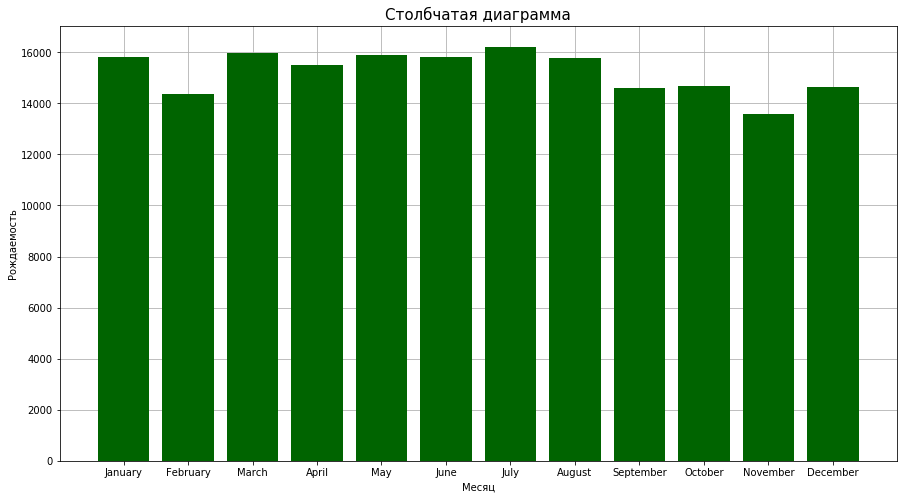

In [36]:
fig, ax = plt.subplots()

ax.bar(on_x, on_y, color = 'darkgreen', zorder = 3)
ax.grid()

fig.set_figwidth(15)
fig.set_figheight(8)

plt.title('Столбчатая диаграмма', fontsize = 15)
plt.xlabel('Месяц', fontsize = 10)
plt.ylabel('Рождаемость', fontsize = 10)

In [37]:
yes_, all_ = int(), int()
set_to_check = cleaned_data.values

for i in range(len(cleaned_data) // 100):
    sampling = []
    sampling = pd.DataFrame(rd.choices(set_to_check, k = 50), columns = ['ID', 'День и месяц'])
    all_ += 1
    if len(sampling['День и месяц']) != len(sampling['День и месяц'].unique()):
        yes_ += 1
print('Результирующая вероятность:', round(yes_ / all_ * 100, 2))

Результирующая вероятность: 96.88


Мы можем запустить последний цикл несколько раз и убедиться, что сформированные случайным образом группы людей в 50 человек, с днями рождений равномерно распределенных в течение года, дают вероятность встречи 2х людей, рожденных в один день, одного месяца, равную ~97%
Мы можем утверждать, что дни рождения распределены равномерно, а небольшой разброс значений — последствие ограниченности выборки